In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

In [2]:
spark = SparkSession.builder.appName("test").getOrCreate()

In [6]:
# Schema
schema = StructType([
    StructField("order_id", StringType()),
    StructField("region", StringType()),
    StructField("category", StringType()),
    StructField("quantity", IntegerType()),
    StructField("price", IntegerType())
])

# Inline data
data = [
    ("O001", "South", "Electronics", 3, 15000),
    ("O002", "North", "Clothing", 5, 2000),
    ("O003", "East", "Furniture", 2, 12000),
    ("O004", "West", "Electronics", 1, 18000),
    ("O005", "North", "Furniture", 4, 9000),
    ("O006", "South", "Clothing", 6, 2500),
    ("O007", "East", "Electronics", 2, 17000)
]

df = spark.createDataFrame(data, schema)
df.show()


+--------+------+-----------+--------+-----+
|order_id|region|   category|quantity|price|
+--------+------+-----------+--------+-----+
|    O001| South|Electronics|       3|15000|
|    O002| North|   Clothing|       5| 2000|
|    O003|  East|  Furniture|       2|12000|
|    O004|  West|Electronics|       1|18000|
|    O005| North|  Furniture|       4| 9000|
|    O006| South|   Clothing|       6| 2500|
|    O007|  East|Electronics|       2|17000|
+--------+------+-----------+--------+-----+



In [7]:
from pyspark.sql.functions import col, sum as _sum, avg, count

df = df.withColumn("revenue", col("quantity") * col("price"))

category_summary = df.groupBy("category").agg(
    _sum("quantity").alias("total_quantity"),
    _sum("revenue").alias("total_revenue"),
    avg("revenue").alias("avg_order_value")
)
category_summary.show()

region_summary = df.groupBy("region").agg(
    count("*").alias("total_orders"),
    _sum("revenue").alias("total_revenue")
)
region_summary.show()

+-----------+--------------+-------------+------------------+
|   category|total_quantity|total_revenue|   avg_order_value|
+-----------+--------------+-------------+------------------+
|Electronics|             6|        97000|32333.333333333332|
|   Clothing|            11|        25000|           12500.0|
|  Furniture|             6|        60000|           30000.0|
+-----------+--------------+-------------+------------------+

+------+------------+-------------+
|region|total_orders|total_revenue|
+------+------------+-------------+
| South|           2|        60000|
|  East|           2|        58000|
| North|           2|        46000|
|  West|           1|        18000|
+------+------------+-------------+



In [8]:
display(category_summary)
display(region_summary)

DataFrame[category: string, total_quantity: bigint, total_revenue: bigint, avg_order_value: double]

DataFrame[region: string, total_orders: bigint, total_revenue: bigint]

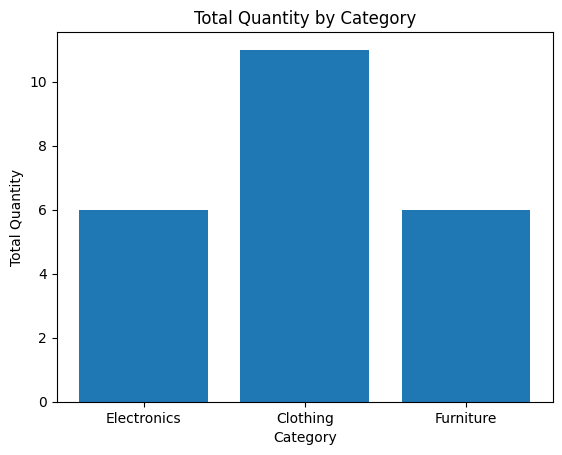

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

pdf = category_summary.toPandas()

plt.bar(pdf["category"], pdf["total_quantity"])
plt.xlabel("Category")
plt.ylabel("Total Quantity")
plt.title("Total Quantity by Category")
plt.show()


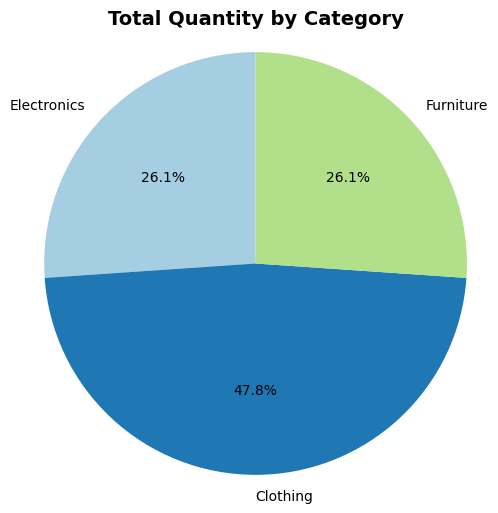

In [11]:
pdf = category_summary.toPandas()

plt.figure(figsize=(6,6))
plt.pie(
    pdf["total_quantity"],
    labels=pdf["category"],
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title("Total Quantity by Category", fontsize=14, fontweight="bold")
plt.axis("equal")
plt.show()

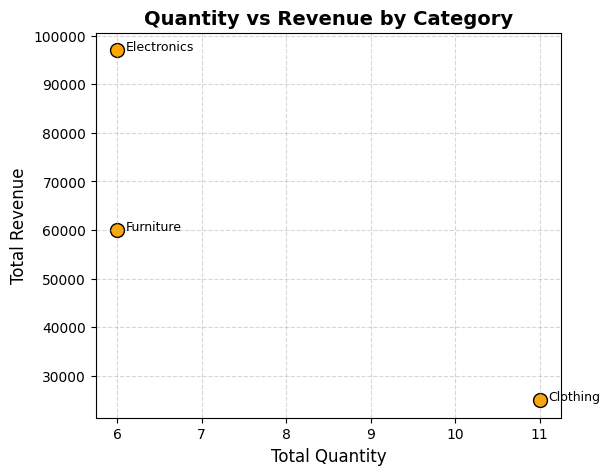

In [12]:
pdf = category_summary.toPandas()

plt.figure(figsize=(6,5))
plt.scatter(pdf["total_quantity"], pdf["total_revenue"], color="orange", edgecolor="black", s=100)

for i, category in enumerate(pdf["category"]):
    plt.text(pdf["total_quantity"][i] + 0.1, pdf["total_revenue"][i], category, fontsize=9)

plt.xlabel("Total Quantity", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.title("Quantity vs Revenue by Category", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
